Now it is your turn: can you help us find the best combustible?
We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have **3 hours** to turn the challenge in starting right now! 💸

## What to do?

### You should aim for:

#### Exploratory data analysis

- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data

<i> Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume <i/>

#### Visualization

- Plot your data in a meaningful way

#### Predictions

- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?

#### Storytelling

- What metrics are you obtaining?
- Explain your conclusions
- Shape your new data and conclusions in such a way that is appealing to the listener and tells a story


### Extra:
#### Enrich your dataset

- Add value: obtain related data by web scraping or with APIs.

#### Database

- Load the processed information into a database

<br>


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [65]:
# We need to find out whether the fuel type impacts consumption

In [34]:
data1 = pd.read_csv('data/measurements.csv')

In [35]:
data2 = pd.read_excel('data/measurements2.xlsx')

In [36]:
data1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [37]:
data1.shape

(388, 12)

In [38]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [39]:
data2.shape

(388, 12)

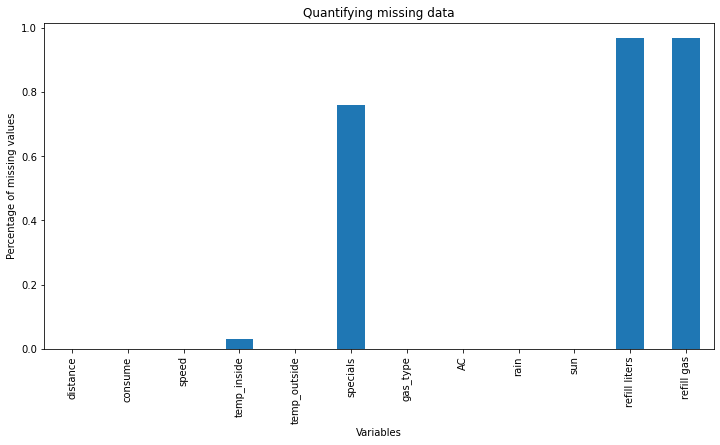

In [40]:
# percentage of Null Values 

data1.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

<Figure size 720x432 with 0 Axes>

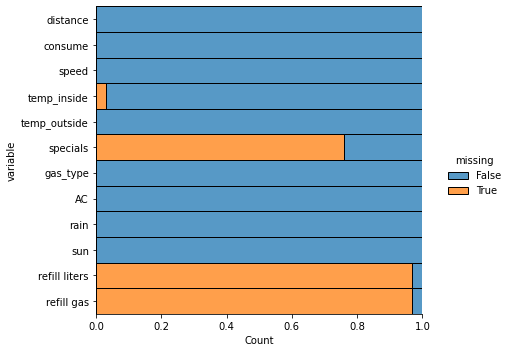

In [42]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
    )
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [43]:
data1.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [44]:
data1['temp_inside'] = data1['temp_inside'].fillna(0)

In [45]:
data1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [46]:
data1.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [48]:
# Replacing comas by periods
data1["distance"]=data1["distance"].str.replace(',','.')

In [49]:
data1["consume"]=data1["consume"].str.replace(',','.')

In [50]:
data1["temp_inside"]=data1["temp_inside"].str.replace(',','.')

In [51]:
data1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,3.8,45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25,31,AC,SP98,1,0,0,NaN,NaN


In [52]:
# Dropping columns with a high number on null values

data1 = data1.drop(['specials', 'refill liters', 'refill gas'], axis = 1)

In [53]:
data1

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25,31,SP98,1,0,0
385,16,3.8,45,25,19,SP98,0,0,0
386,15.4,4.6,42,25,31,SP98,1,0,0


In [54]:
# Splitting numerical and categorical data

In [55]:
numerical = data1.select_dtypes('number')

In [56]:
catagorical = data1.select_dtypes('object')

In [57]:
numerical

,speed,temp_outside,AC,rain,sun
0,26,12,0,0,0
1,30,13,0,0,0
2,38,15,0,0,0
3,36,14,0,0,0
4,46,15,0,0,0
...,...,...,...,...,...
383,39,18,0,0,0
384,38,31,1,0,0
385,45,19,0,0,0
386,42,31,1,0,0


In [58]:
catagorical

,distance,consume,temp_inside,gas_type
0,28,5,21.5,E10
1,12,4.2,21.5,E10
2,11.2,5.5,21.5,E10
3,12.9,3.9,21.5,E10
4,18.5,4.5,21.5,E10
...,...,...,...,...
383,16,3.7,24.5,SP98
384,16.1,4.3,25,SP98
385,16,3.8,25,SP98
386,15.4,4.6,25,SP98


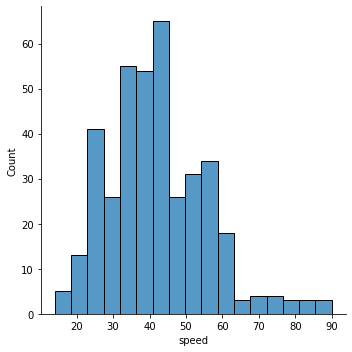

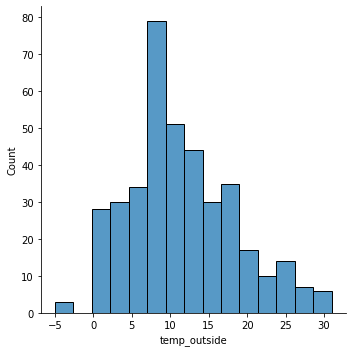

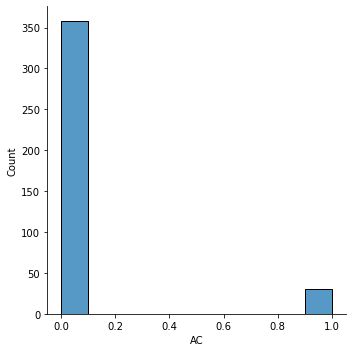

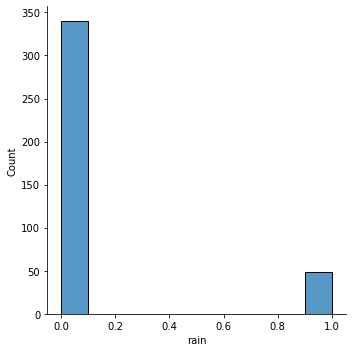

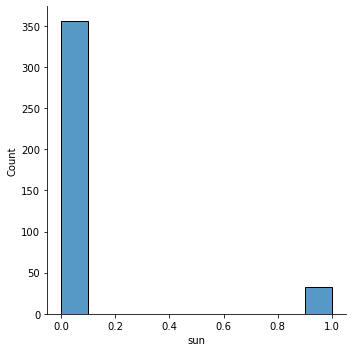

In [60]:
for column in numerical:
    sns.displot(numerical[column])
    plt.show()

In [61]:
correlations = numerical.corr()

In [62]:
correlations

,speed,temp_outside,AC,rain,sun
speed,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.015411,1.000000,0.167562,-0.186315,0.346903
AC,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081618,0.346903,0.088598,-0.112650,1.000000


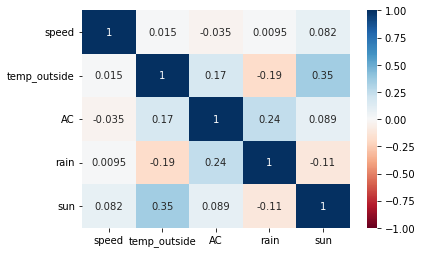

In [64]:
sns.heatmap(correlations, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()